In [1]:
#Defining Directories and categories first print data

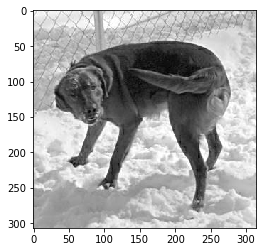

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import pandas as pd
from keras.utils import np_utils

TRAIN_DATADIR = "/home/reinaldo/Documentos/PetImages/database"
TEST_DATADIR = "/home/reinaldo/Documentos/PetImages/"
CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(TRAIN_DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [3]:
print(img_array)

[[247 255 251 ... 174 183 192]
 [246 250 255 ... 190 197 206]
 [248 247 255 ... 193 199 205]
 ...
 [166 160 157 ... 214 202 192]
 [167 162 159 ... 226 212 200]
 [167 163 162 ... 240 224 209]]


In [4]:
print(img_array.shape)

(307, 315)


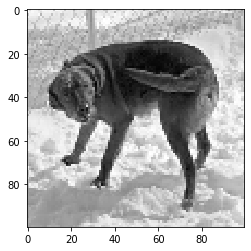

(100, 100)


In [5]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
new_array2 = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.imshow(new_array2, cmap='gray')
plt.show()
print(new_array.shape)

# Create training and test data

In [6]:
training_data = []
test_data = []
def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path_train = os.path.join(TRAIN_DATADIR,category)  # create path to dogs and cats to train
        path_test = os.path.join(TEST_DATADIR,category)  # create path to dogs and cats to test
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path_train)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path_train,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
        for img in tqdm(os.listdir(path_test)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path_test,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array2 = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                test_data.append([new_array2, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass            
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))
print(len(test_data))


100%|██████████| 12501/12501 [00:38<00:00, 327.75it/s]

200
24946


In [7]:
import random

random.shuffle(training_data)
random.shuffle(test_data)

# Reshape training and test data

In [8]:
X_test = []
X_train = []
y_test = []
y_train = []

for features,label in training_data:
    X_train.append(features)
    y_train.append(label)

print(X_train[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

for features,label in test_data:
    X_test.append(features)
    y_test.append(label)

print(X_test[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[  9]
   [ 12]
   [ 10]
   ...
   [ 29]
   [ 15]
   [ 17]]

  [[  8]
   [  8]
   [  7]
   ...
   [ 40]
   [ 18]
   [ 23]]

  [[ 10]
   [  6]
   [ 13]
   ...
   [ 39]
   [ 25]
   [ 29]]

  ...

  [[ 51]
   [ 78]
   [ 84]
   ...
   [106]
   [ 88]
   [101]]

  [[ 82]
   [ 55]
   [ 55]
   ...
   [ 90]
   [ 68]
   [116]]

  [[ 72]
   [ 90]
   [100]
   ...
   [ 67]
   [104]
   [ 97]]]]
[[[[163]
   [165]
   [165]
   ...
   [ 42]
   [ 32]
   [ 26]]

  [[167]
   [167]
   [168]
   ...
   [ 43]
   [ 35]
   [ 28]]

  [[168]
   [169]
   [170]
   ...
   [ 45]
   [ 33]
   [ 32]]

  ...

  [[133]
   [137]
   [ 46]
   ...
   [ 10]
   [  8]
   [  9]]

  [[136]
   [139]
   [ 37]
   ...
   [ 10]
   [ 13]
   [  9]]

  [[137]
   [141]
   [ 39]
   ...
   [ 12]
   [ 10]
   [  8]]]]


In [9]:
import pickle

pickle_out = open("X_test.pickle","wb")
pickle.dump(X_test,pickle_out)

pickle_out.close()

pickle_out = open("y_test.pickle","wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

pickle_out = open("X_train.pickle","wb")
pickle.dump(X_train,pickle_out)

pickle_out.close()

pickle_out = open("y_train.pickle","wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()


# Saving data on pickle files

In [10]:
#We can always load it in to our current script, or a totally new one by doing:

pickle_in = open("X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("y_train.pickle","rb")
y_train = pickle.load(pickle_in)
pickle_in = open("X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("y_test.pickle","rb")
y_test = pickle.load(pickle_in)

# Apply data on first training machine

In [11]:
import tensorflow as tf
#from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import keras

import pickle

pickle_in = open("X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("y_train.pickle","rb")
y_train = pickle.load(pickle_in)

pickle_in = open("X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("y_test.pickle","rb")

y_test = pickle.load(pickle_in)
y_test = np_utils.to_categorical(y_test,2)
y_train = np_utils.to_categorical(y_train,2)

X_train = X_train/255.0
X_test = X_test/255.0

model = Sequential()

model.add(Conv2D(20, (3, 3), input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(20, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['categorical_accuracy'])
print("reinaldo")
model.fit(X_train, y_train, batch_size=32, epochs=5, validation_split=0.3)
print("score of the model test:")
score = model.evaluate(X_test, y_test, verbose=0)
print(score)
prediction = model.predict(X_test, batch_size=1)
print(prediction)

W0728 21:07:03.911505 139993850164864 deprecation.py:506] From /home/reinaldo/masters/ai/.venv/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


reinaldo
Train on 140 samples, validate on 60 samples
Epoch 1/5
140/140 [==============================] - 1s 6ms/sample - loss: 1.2556 - categorical_accuracy: 0.5286 - val_loss: 0.9822 - val_categorical_accuracy: 0.5333
Epoch 2/5
140/140 [==============================] - 1s 5ms/sample - loss: 0.8433 - categorical_accuracy: 0.4857 - val_loss: 0.6924 - val_categorical_accuracy: 0.4833
Epoch 3/5
140/140 [==============================] - 1s 5ms/sample - loss: 0.6538 - categorical_accuracy: 0.6500 - val_loss: 0.6977 - val_categorical_accuracy: 0.4667
Epoch 4/5
140/140 [==============================] - 1s 5ms/sample - loss: 0.6012 - categorical_accuracy: 0.7786 - val_loss: 0.6883 - val_categorical_accuracy: 0.5833
Epoch 5/5
140/140 [==============================] - 1s 4ms/sample - loss: 0.5803 - categorical_accuracy: 0.6929 - val_loss: 0.6643 - val_categorical_accuracy: 0.5500
score of the model test:
[0.6809589449848789, 0.56081134]
[[0.62201875 0.37798125]
 [0.5593181  0.44068187]
 [0